# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# COLLECT DATA

In [11]:
df = pd.read_csv('emailspam.csv',encoding='latin-1')

In [12]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
df.size

27860

# DATA CLEANING
Remove irrelevant data or columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [17]:
#drop last three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [21]:
df.sample(4)

,v1,v2
3426,ham,Haha okay... Today weekend leh...
1205,ham,The whole car appreciated the last two! Dad an...
1710,ham,"(No promises on when though, haven't even gott..."
664,ham,Yes baby! We can study all the positions of th...


In [22]:
#remaining columns
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [23]:
df.sample(4)

,Target,Text
3290,ham,I'm not smoking while people use \wylie smokes...
3552,ham,Din i tell u jus now 420
4223,ham,Double eviction this week - Spiral and Michael...
4245,ham,Well welp is sort of a semiobscure internet thing


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [27]:
df['Target']=encoder.fit_transform(df['Target'])

In [28]:
df.head(4)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [12]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
#checking duplicated values
df.duplicated().sum()

403

In [15]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# Exploratory Data Analysis (EDA) 
is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables. 

In [29]:
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [30]:
df['Target'].value_counts()

Target
0    4825
1     747
Name: count, dtype: int64

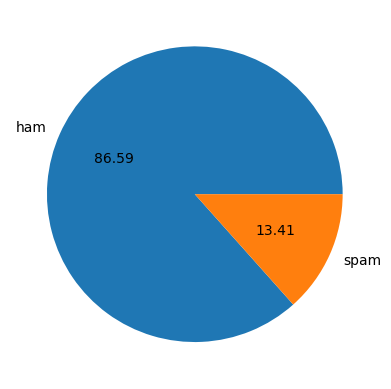

In [31]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

from above data is imbalanced,now let's analyze the data

In [32]:
!pip install nltk

In [33]:
import nltk

NLTK is natural lanuage toolkit.It is popular library for working with human language data in python which provides a wide range of tools and resources for tasks such as tokenization,stemming,lemmatixarion,part of speech,tagging,parsing,semantic reasoning and more
nltk.download('punkt') command is used to download punkt resource from NLTK

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5572, dtype: int64

In [37]:
df['num_characters']=df['Text'].apply(len)
df.head(4)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [38]:
#fech no.of words
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5572, dtype: object

In [39]:
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5572, dtype: int64

In [40]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(4)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [41]:
#fetch no.of sentencces
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5572, dtype: object

In [42]:
df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5572, dtype: int64

In [43]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [45]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


ANALYZE SPAM AND HAM SEPARATELY

In [46]:
#ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

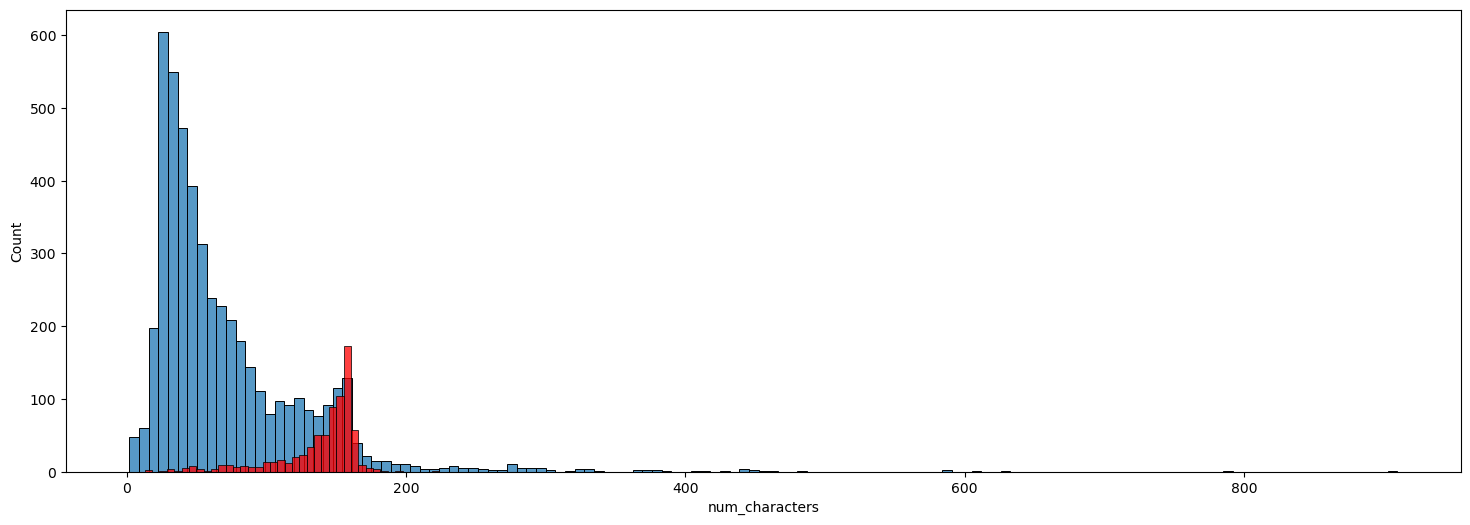

In [48]:
#plot histogram of ham & spam email
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

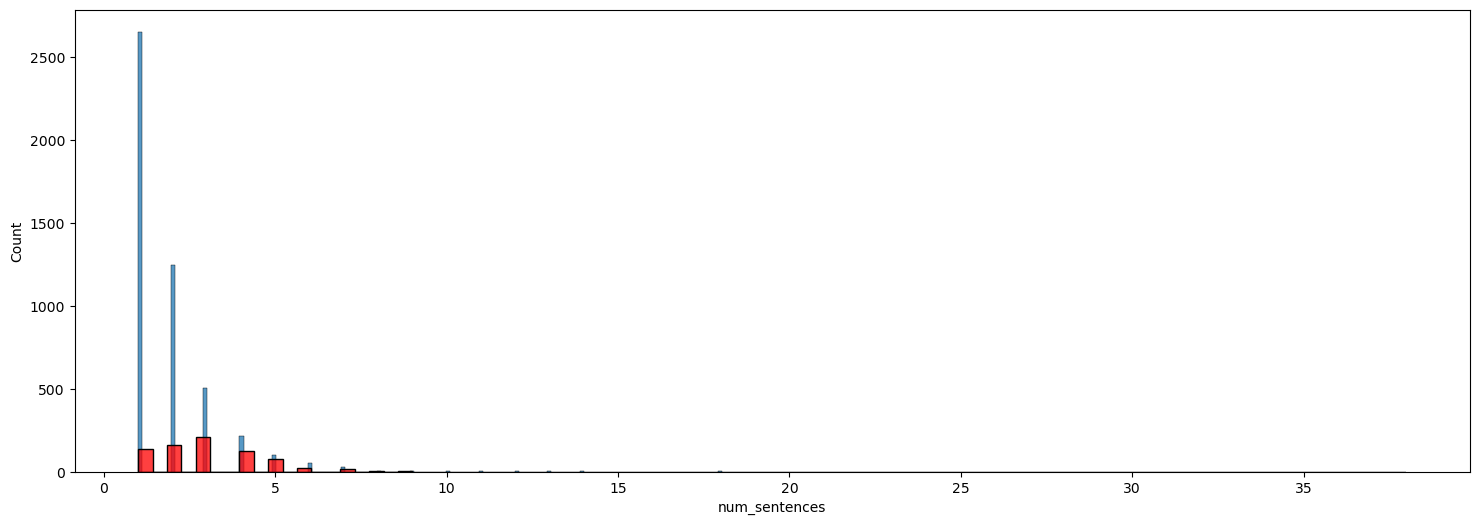

In [49]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')

C:\Users\sadan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


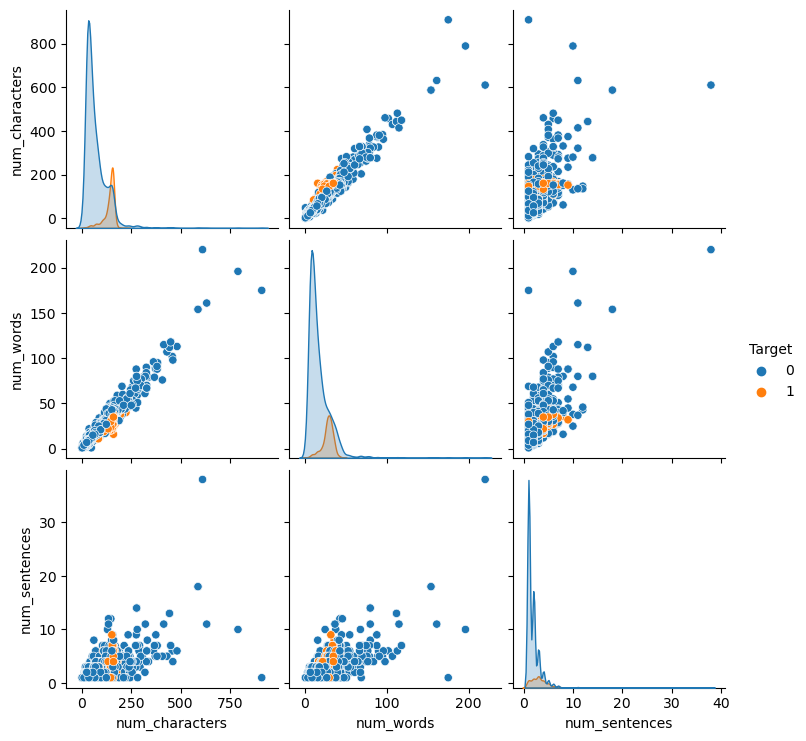

In [50]:
sns.pairplot(df,hue='Target')

In [63]:
#df.corr()
df.corr(numeric_only=True)


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


<Axes: >

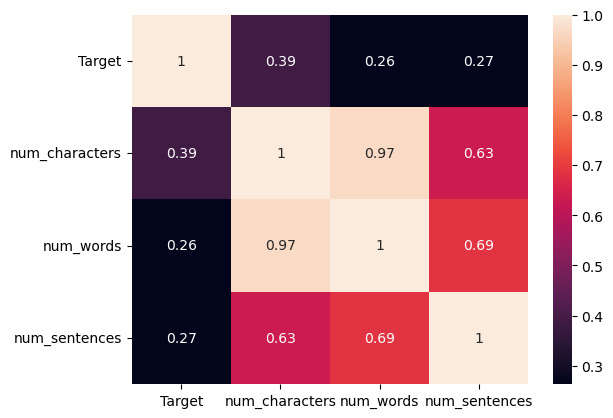

In [64]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# DATA PREPRCESSING
Data preprocessing in data science is a crucial step that involves converting raw datasets into a format that is consumable, understandable, and usable for further analysis.

In [65]:
def transform_text1(text1):
    text1=text1.lower()
    return text1

In [66]:
#lower
transform_text1("HI HOW ARE YOU")

'hi how are you'

In [67]:
#tokenization
def transform_text2(text2):
    text2=nltk.word_tokenize(text2)
    return text2

In [68]:
transform_text2("HI HOW ARE YOU")

['HI', 'HOW', 'ARE', 'YOU']

In [71]:
#remove special character
def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
            y.append(i)
    return y

In [72]:
transform_text3("HI how Are % @ 12 04 31*")

['H', 'I', 'h', 'o', 'w', 'A', 'r', 'e', '1', '2', '0', '4', '3', '1']

In [73]:
def transform_text3a(text3a):
    text3a=text3a.lower()
    text3a=nltk.word_tokenize(text3a)
    y_a=[]
    for i in text3a:
        if i.isalnum():
            y_a.append(i)
    return y_a

In [74]:
transform_text3a("HI how Are % @ 12 04 31*")

['hi', 'how', 'are', '12', '04', '31']

In [75]:
#remove stop words & punctuation
#stemming
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
def transform_text4(text4):
    text4=text4.lower()
    text4=nltk.word_tokenize(text4)
    y_4=[]
    for i in text4:
        if i.isalnum():
            y_4.append(i)
    text4=y_4[:]
    y_4.clear()
    for i in text4:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_4.append(i)
    return y_4

In [78]:
transform_text4("HI how Are % @ 12 04 31*")

['hi', '12', '04', '31']

In [79]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [83]:
def transform_text5(text5):
    text5=text5.lower()
    text5=nltk.word_tokenize(text5)
    y_5=[]
    for i in text5:
        if i.isalnum():
            y_5.append(i)
    text5=y_5[:]
    y_5.clear()
    for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_5.append(i)
    for i in text5:
        y_5.append(ps.stem(i))
    return " ".join(y_5)

In [84]:
transform_text5("Hello I am doing Oasis Internship in domain of DataScience")

'hello oasis internship domain datascience hello i am do oasi internship in domain of datasci'

In [85]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [86]:
transform_text5('I sent you  &lt;#&gt;  bucks')

'sent lt gt bucks i sent you lt gt buck'

In [87]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [88]:
transform_text5("But i'll b going 2 sch on mon. My sis need 2 take smth.")

'b going 2 sch mon sis need 2 take smth but i b go 2 sch on mon my si need 2 take smth'

In [91]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [93]:
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object

In [94]:
df['Transform_text']=df['Text'].apply(transform_text)

In [95]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [96]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 403.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 344.8 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 476.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 476.3 kB/s eta 0:00:01
 

In [97]:
from wordcloud import WordCloud
from PIL import Image,ImageDraw,ImageFont
wc=WordCloud(width=800,height=800,min_font_size=10,background_color='white')

In [98]:
df['Target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5572, dtype: bool

In [99]:
df[df['Target']==1]

,Target,Text,num_characters,num_words,num_sentences,Transform_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [103]:
df[df['Target']==1]['Transform_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transform_text, Length: 747, dtype: object

In [104]:
df[df['Target']==1]['Transform_text'].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [105]:
wc.generate(df[df['Target']==1]['Transform_text'].str.cat(sep=" "))

In [106]:
spam_wc=wc.generate(df[df['Target']==1]['Transform_text'].str.cat(sep=" "))

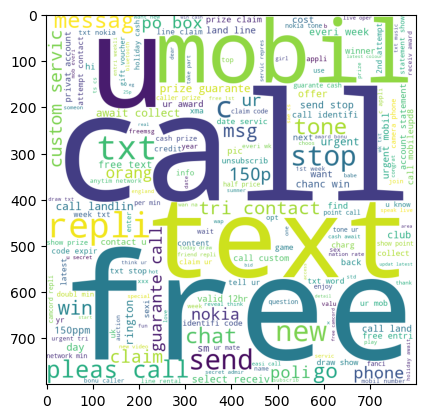

In [107]:
plt.imshow(spam_wc)

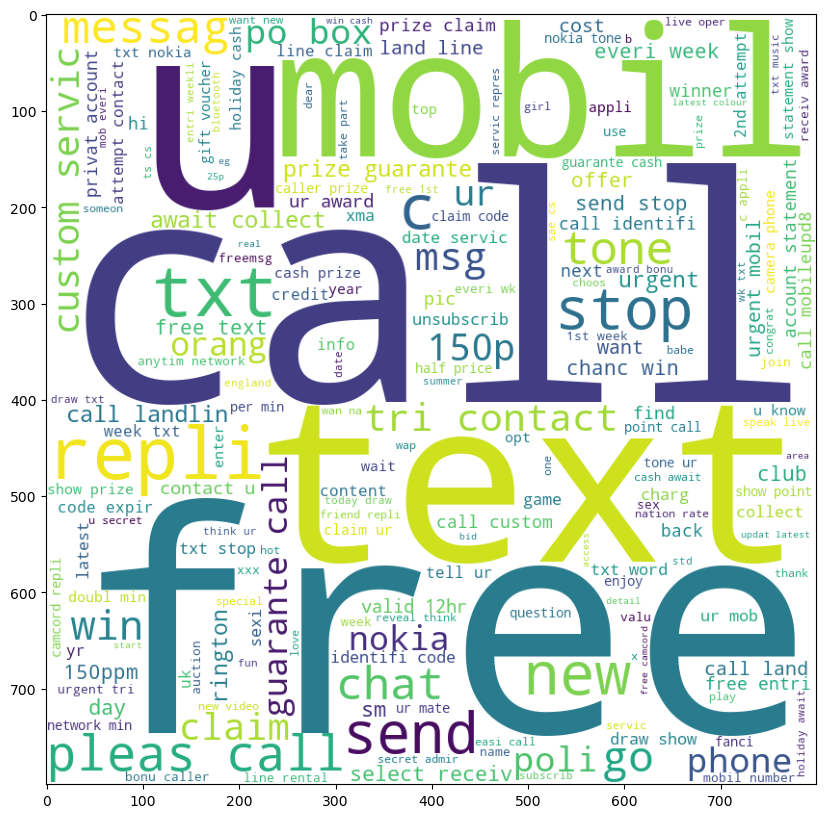

In [108]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [109]:
ham_wc=wc.generate(df[df['Target']==0]['Transform_text'].str.cat(sep=" "))

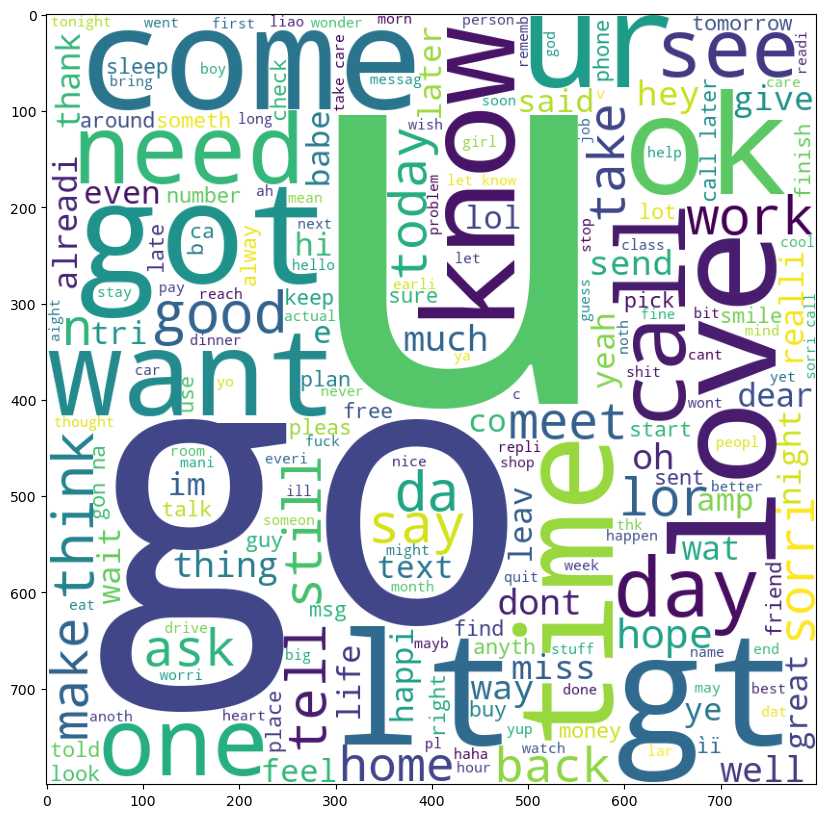

In [110]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

In [111]:
#top words used in spam& ham
df.head(5)

,Target,Text,num_characters,num_words,num_sentences,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [112]:
df[df['Target']==1]['Transform_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transform_text, Length: 747, dtype: object

In [114]:
df[df['Target']==1]['Transform_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [115]:
for msg in df[df['Target']==1]['Transform_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [117]:
for msg in df[df['Target']==1]['Transform_text'].tolist():
    print(msg.split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [119]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [120]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [121]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 365,
         'free': 219,
         '2': 174,
         'txt': 169,
         'ur': 144,
         'u': 141,
         'text': 139,
         'mobil': 135,
         '4': 120,
         'claim': 115,
         'stop': 114,
         'repli': 112,
         'prize': 94,
         'get': 88,
         'tone': 74,
         'servic': 72,
         'send': 70,
         'new': 69,
         'nokia': 68,
         'award': 66,
         'week': 62,
         'cash': 62,
         'urgent': 62,
         'win': 61,
         'contact': 61,
         'pleas': 57,
         'phone': 57,
         'c': 51,
         'custom': 51,
         'collect': 51,
         'min': 51,
         'guarante': 50,
         'per': 46,
         'messag': 45,
         'chat': 45,
         'cs': 41,
         'draw': 40,
         'offer': 40,
         'tri': 39,
         'number': 39,
         'today': 38,
         'receiv': 37,
         'latest': 37,
         'line': 37,
         'msg': 36,
         'voucher': 36,
         

In [122]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [123]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


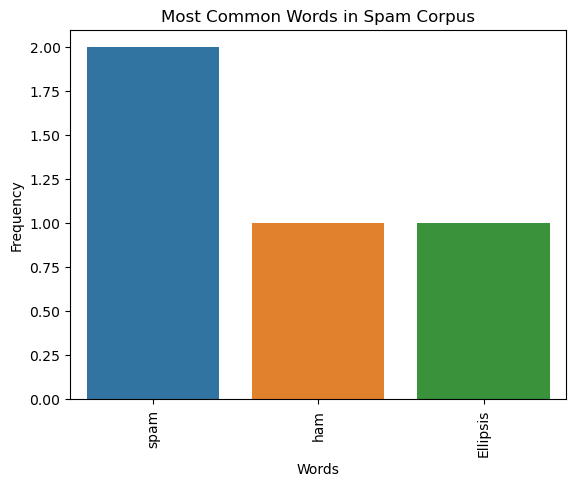

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming you have a valid spam_corpus (list of strings)
spam_corpus = ["spam", "spam", "ham", ...]  # Example data

# Calculate word frequencies
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

# Create the bar plot
sns.barplot(x=[word[0] for word in most_common_words],
            y=[word[1] for word in most_common_words])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Spam Corpus")
plt.show()


In [130]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [131]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [132]:
len(ham_corpus)

38221

In [133]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 979),
 ('go', 417),
 ('get', 357),
 ('gt', 318),
 ('lt', 316),
 ('2', 300),
 ('come', 295),
 ('call', 291),
 ('know', 248),
 ('ok', 245),
 ('like', 244),
 ('got', 242),
 ('love', 241),
 ('ur', 237),
 ('good', 230),
 ('time', 228),
 ('want', 212),
 ('day', 212),
 ('need', 174),
 ('one', 174),
 ('4', 163),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 153),
 ('think', 151),
 ('da', 150),
 ('take', 149),
 ('still', 148),
 ('n', 139)]

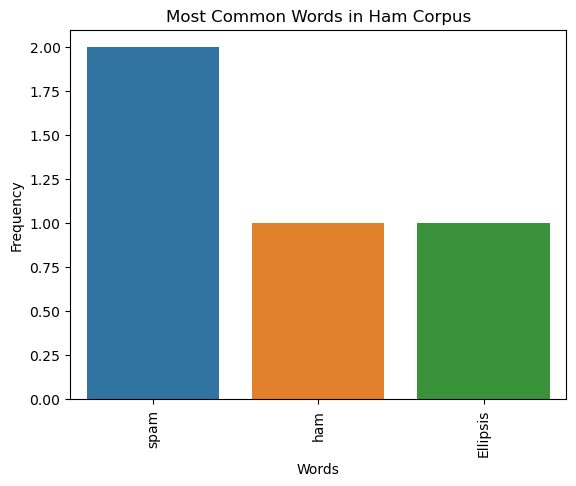

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming you have a valid spam_corpus (list of strings)
ham_corpus = ["spam", "spam", "ham", ...]  # Example data

# Calculate word frequencies
word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)

# Create the bar plot
sns.barplot(x=[word[0] for word in most_common_words],
            y=[word[1] for word in most_common_words])
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Ham Corpus")
plt.show()


# MODEL BUILDING

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [136]:
x=cv.fit_transform(df['Transform_text']).toarray()

In [140]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [141]:
x.shape

(5572, 6708)

In [142]:
y=df['Target'].values

In [143]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [146]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [147]:
gnb=GaussianNB()

In [148]:
mnb=MultinomialNB()

In [150]:
bnb=BernoulliNB()

In [151]:
gnb.fit(x_train,y_train)
y_pre_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,y_pre_gnb))
print(confusion_matrix(y_test,y_pre_gnb))
print(precision_score(y_test,y_pre_gnb))


0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


In [152]:
mnb.fit(x_train,y_train)
y_pre_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,y_pre_mnb))
print(confusion_matrix(y_test,y_pre_mnb))
print(precision_score(y_test,y_pre_mnb))

0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539


In [153]:
bnb.fit(x_train,y_train)
y_pre_bnb=bnb.predict(x_test)
print(accuracy_score(y_test,y_pre_bnb))
print(confusion_matrix(y_test,y_pre_bnb))
print(precision_score(y_test,y_pre_bnb))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [156]:
x_tfidf=tfidf.fit_transform(df['Transform_text']).toarray()

In [157]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
x_tfidf.shape

(5572, 6708)

In [159]:
y_tfidf=df['Target'].values

In [160]:
y_tfidf.shape

(5572,)

In [161]:
from sklearn.model_selection import train_test_split
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(x_tfidf,y_tfidf,test_size=0.2,random_state=2)

In [162]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [163]:
gnb.fit(x_train_tfidf,y_train_tfidf)
y_pre_gnb_tfidf=gnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pre_gnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pre_gnb_tfidf))
print(precision_score(y_test_tfidf,y_pre_gnb_tfidf))


0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [164]:
mnb.fit(x_train_tfidf,y_train_tfidf)
y_pre_mnb_tfidf=mnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pre_mnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pre_mnb_tfidf))
print(precision_score(y_test_tfidf,y_pre_mnb_tfidf))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [165]:
bnb.fit(x_train_tfidf,y_train_tfidf)
y_pre_bnb_tfidf=bnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pre_bnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pre_bnb_tfidf))
print(precision_score(y_test_tfidf,y_pre_bnb_tfidf))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921
